# excerise 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

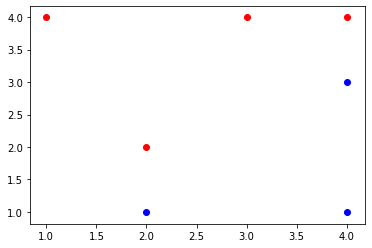

In [2]:
x_red = [3,2,4,1]
y_red= [4,2,4,4]

x_blue =[2,4,4]
y_blue = [1,3,1]

plt.scatter(x_red, y_red, color='r')
plt.scatter(x_blue, y_blue, color='b')
plt.show()

In [3]:
X = np.concatenate((np.array(x_red), np.array(x_blue))).reshape(-1,1)
y = np.concatenate((np.array(y_red), np.array(y_blue))).reshape(-1,1)
X = np.concatenate((X,y), axis=1)
b = np.ones((7,1))
X = np.concatenate((X, b), axis=1)


In [4]:
target = np.array([-1,-1,-1,-1,1,1,1], dtype=np.float64)

In [5]:
from sklearn.utils import shuffle
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 0.2 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss =  (np.sum(distances) / N)
    
    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
    distance = 0.2 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = 0
        else:
            di = -Y_batch[ind] * X_batch[ind]
        
        dw += di
    dw = dw/len(Y_batch)  # average
    return dw


def sgd(features, outputs):
    max_epochs = 1000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    learning_rate = 0.001
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for i, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[i])
            weights = weights - (learning_rate * ascent)
        # convergence check on 2^nth epoch
            cost = compute_cost(weights, features, outputs)
            # stoppage criterion
            if abs(prev_cost - cost) < 0:
                return weights
            prev_cost = cost
    return weights


weights = sgd(X, target)

In [6]:
weights = -weights / weights[1]

In [7]:
x = np.arange(0.5,5,0.5)

In [8]:
y_pred =  weights[0] * x + weights[2]

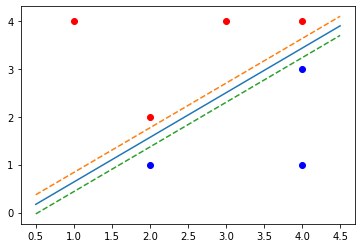

In [9]:
x_red = [3,2,4,1]
y_red= [4,2,4,4]

x_blue =[2,4,4]
y_blue = [1,3,1]

plt.scatter(x_red, y_red, color='r')
plt.scatter(x_blue, y_blue, color='b')
plt.plot(x, y_pred)
plt.plot(x, y_pred + 0.2, '--')
plt.plot(x, y_pred - 0.2, '--')
plt.show()

# Excersice

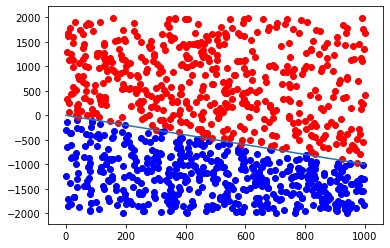

In [10]:
m, b = -1, 1
num_points = 500
lower, upper = -2000,2000

x1_train = [random.randrange(start=1, stop=1000) for i in range(num_points)]
x2_train = [random.randrange(start=1, stop=1000) for i in range(num_points)]

y1_train = [random.randrange(start=lower, stop=m*x+b) for x in x1_train]
y2_train = [random.randrange(start=m*x+b, stop=upper) for x in x2_train]

plt.plot(np.arange(1000), m*np.arange(1000)+b)
plt.scatter(x1_train, y1_train, c='blue')
plt.scatter(x2_train, y2_train, c='red')

In [11]:
X = np.concatenate((np.array(x1_train), np.array(x2_train))).reshape(-1,1)
y = np.concatenate((np.array(y1_train), np.array(y2_train))).reshape(-1,1)
X = np.concatenate((X,y), axis=1)

In [12]:
target = np.ones((1000,1))
target[:500] = 0
train_y = target
# scaler = MinMaxScaler()
# print(scaler.fit(X))
train_X = X

In [13]:
m, b = -1, 1
num_points = 500
lower, upper = -2000, 2000

x1 = [random.randrange(start=1, stop=1000) for i in range(num_points)]
x2 = [random.randrange(start=1, stop=1000) for i in range(num_points)]

y1 = [random.randrange(start=lower, stop=m*x+b) for x in x1]
y2 = [random.randrange(start=m*x+b, stop=upper) for x in x2]


X = np.concatenate((np.array(x1), np.array(x2))).reshape(-1,1)
y = np.concatenate((np.array(y1), np.array(y2))).reshape(-1,1)
X = np.concatenate((X,y), axis=1)
test_X = X

In [14]:
target = np.ones((1000,1))
target[:500] = 0
test_y = target

In [15]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(train_X, train_y.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [16]:
y_pred = clf.predict(test_X)

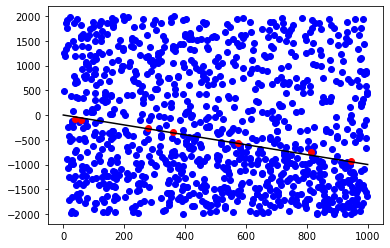

In [18]:
correct_classified = test_X[np.concatenate((y_pred[:500] == 0, y_pred[500:] == 1))]
incorrect_classified = test_X[np.concatenate((y_pred[:500] == 1, y_pred[500:] == 0))]
plt.scatter(correct_classified[:,0], correct_classified[:, 1], color='blue')
plt.scatter(incorrect_classified[:, 0], incorrect_classified[:, 1], color='red')
plt.plot(np.arange(1000), -np.arange(1000) + 1, color='black')

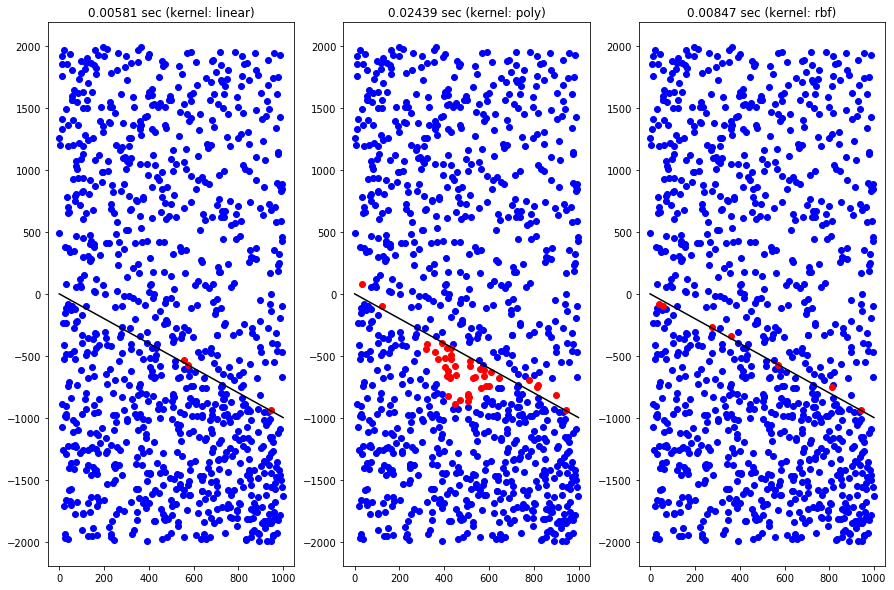

In [19]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import time
from sklearn.preprocessing import StandardScaler
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
kernels =['linear','poly','rbf']
for i, name in enumerate(kernels):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=name))
    st = time.time()
    clf.fit(train_X, train_y.ravel())
    et = time.time()
    y_pred = clf.predict(test_X)
    correct_classified = test_X[np.concatenate((y_pred[:500] == 0, y_pred[500:] == 1))]
    incorrect_classified = test_X[np.concatenate((y_pred[:500] == 1, y_pred[500:] == 0))]
    axs[i].scatter(correct_classified[:,0], correct_classified[:, 1], color='blue')
    axs[i].scatter(incorrect_classified[:, 0], incorrect_classified[:, 1], color='red')
    axs[i].plot(np.arange(1000), -np.arange(1000) + 1, color='black')
    axs[i].title.set_text(str(round(et-st, 5)) + " sec" + " (kernel: " + name + ")")
    
plt.show()    

# PART 2

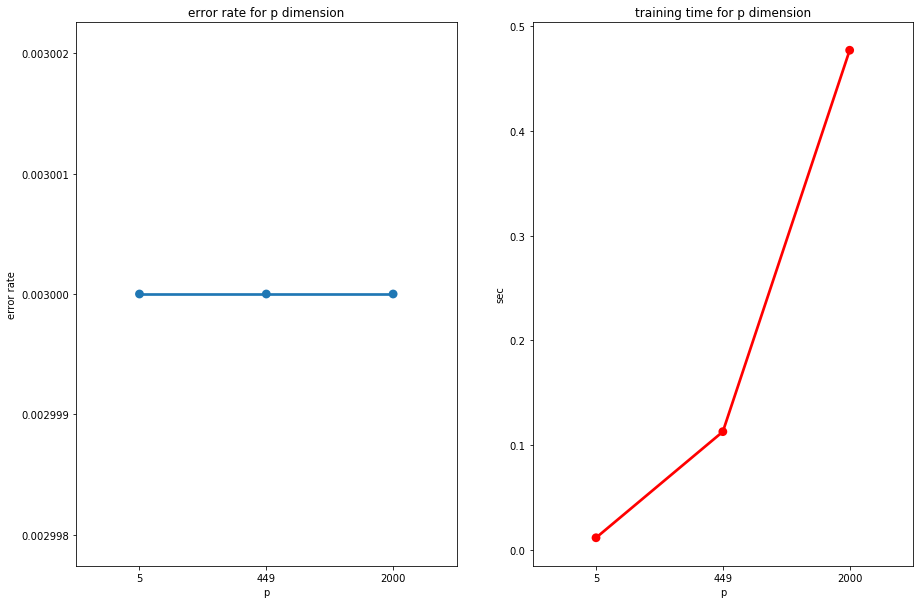

In [20]:
m, b = -1, 1
num_points = 1000
lower, upper = -2000,2000
pvalues = [5,449, 2000]
errors = []
times = []
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for p in pvalues:
    
    
#     new_dim_x_train = [[random.randrange(start=1, stop=1000) for i in range(num_points)] for i in range(p)]
#     new_dim_y_train = [[random.randrange(start=lower, stop=upper) for x in new_dim_x_train[i]] for i in range(p)]
    new_dim_x_train, new_dim_y_train = np.ones((1000, p)), np.ones((1000, p)) 
    new_dim_x_test, new_dim_y_test = np.ones((1000, p)), np.ones((1000, p))
#     new_dim_x_test = [[random.randrange(start=1, stop=1000) for i in range(num_points)] for i in range(p)]
#     new_dim_y_test = [[random.randrange(start=lower, stop=upper) for x in new_dim_x_test[i]] for i in range(p)] 

    xy_train = np.concatenate((np.array(new_dim_x_train), np.array(new_dim_y_train)), axis=1)
    xy_test = np.concatenate((np.array(new_dim_x_test), np.array(new_dim_y_test)), axis=1)
    
    new_train_X = np.concatenate((train_X, xy_train), axis=1)
    new_test_X = np.concatenate((test_X, xy_test), axis=1)
    clf_linear = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear'))
    st = time.time()
    clf_linear.fit(new_train_X, train_y.ravel())
    et = time.time()
    errors.append(1 - clf_linear.score(new_test_X, test_y))
    times.append(et - st)

df = pd.DataFrame({'col1':pvalues, 'col2':errors})
sns.pointplot(data=df, x='col1', y='col2', ax=axs[0])
axs[0].title.set_text('error rate for p dimension')
axs[0].set_xlabel('p')
axs[0].set_ylabel('error rate')
df = pd.DataFrame({'col1':pvalues, 'col2':times})
sns.pointplot(data=df, x='col1', y='col2', ax=axs[1], color='r')
axs[1].title.set_text('training time for p dimension')
axs[1].set_xlabel('p')
axs[1].set_ylabel('sec')

plt.show()

In [21]:
new_train_X = np.concatenate((train_X, xy_train), axis=1)
new_test_X = np.concatenate((test_X, xy_test), axis=1)

In [22]:
clf_linear = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear'))
st = time.time()
clf_linear.fit(new_train_X, train_y.ravel())
et = time.time()

In [23]:
print(clf_linear.score(new_test_X, test_y))
print("took sec:", str(round(et-st,6)))

0.997
took sec: 0.469656


# PART 3

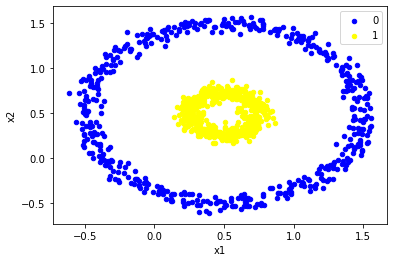

In [24]:
from sklearn.datasets import make_circles
import pandas as pd
test_X, test_y = make_circles(n_samples=1000, factor=0.24, noise=0.05, random_state=42)

train_X, train_y = make_circles(n_samples=1000, factor=0.24, noise=0.05, random_state=42)
train_X += 0.5
test_X += 0.5
df = pd.DataFrame(dict(x1=train_X[:, 0], x2=train_X[:, 1], y=train_y))

colors = {0:'blue', 1:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

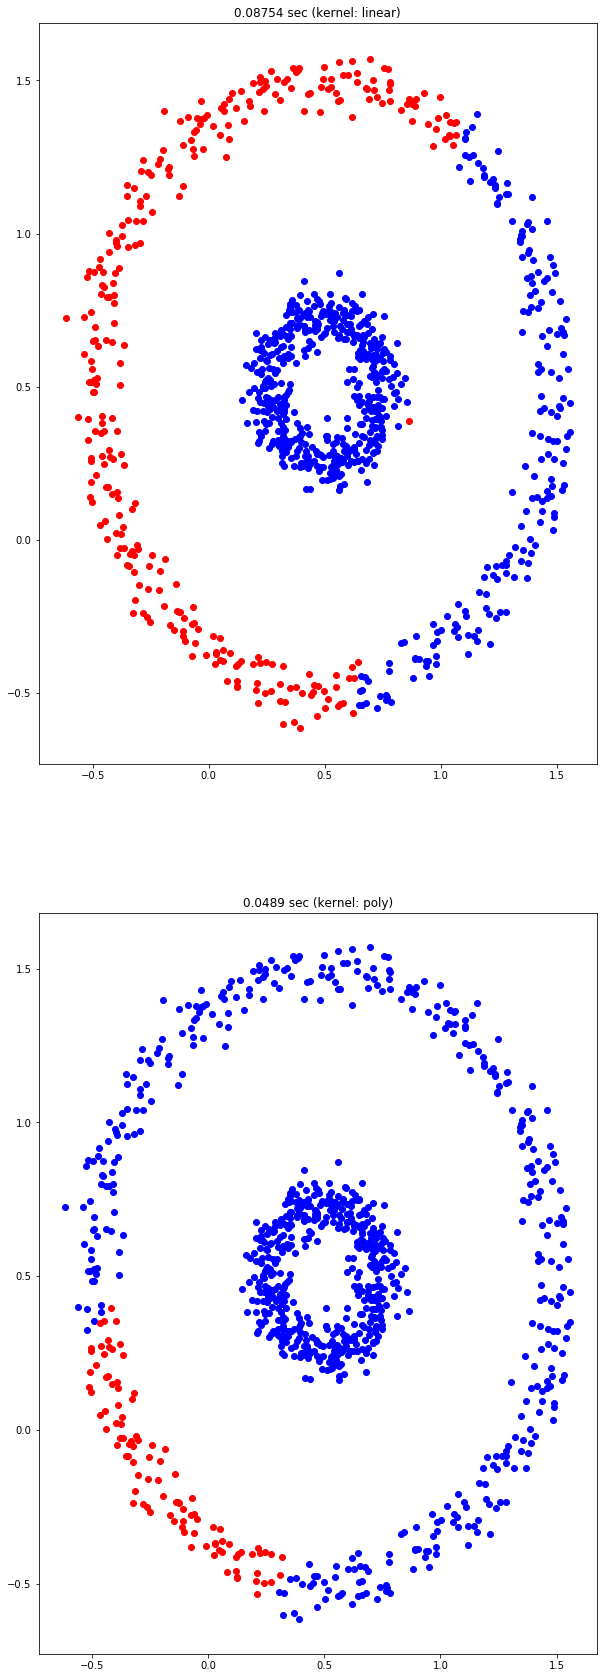

In [25]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import time
from sklearn.preprocessing import StandardScaler
fig, axs = plt.subplots(2, 1, figsize=(10,30))
kernels =['linear','poly']
for i, name in enumerate(kernels):
    if name=='poly':
        clf = SVC(gamma='auto', kernel=name, degree=2)
    else:
        clf = SVC(gamma='auto', kernel=name)
    st = time.time()
    clf.fit(train_X, train_y.ravel())
    et = time.time()
    y_pred = clf.predict(test_X)
    correct_classified = test_X[y_pred==test_y]
    incorrect_classified = test_X[~(y_pred==test_y)]
    axs[i].scatter(correct_classified[:,0], correct_classified[:, 1], color='blue')
    axs[i].scatter(incorrect_classified[:, 0], incorrect_classified[:, 1], color='red')
    # axs[i].plot(np.arange(1000), -np.arange(1000) + 1, color='black')
    axs[i].title.set_text(str(round(et-st, 5)) + " sec" + " (kernel: " + name +")")
    
plt.show()   

In [26]:
def RBF(X, gamma):
    
    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]
        
    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))
    
    return K

In [27]:
train_X_rbf = RBF(train_X, gamma=None)
test_X_rbf = RBF(test_X, gamma=None)

In [28]:
from sklearn.metrics import accuracy_score
clf = SVC(kernel="linear")

clf.fit(train_X_rbf, train_y)

pred = clf.predict(test_X_rbf)

print("Accuracy: ",accuracy_score(pred, test_y))

Accuracy:  1.0


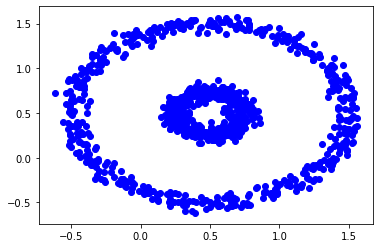

In [29]:
correct_classified = test_X[pred==test_y]
incorrect_classified = test_X[~(pred==test_y)]
plt.scatter(correct_classified[:,0], correct_classified[:, 1], color='blue')
plt.scatter(incorrect_classified[:, 0], incorrect_classified[:, 1], color='red')
plt.show()

In [30]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, W, b, kernel, test_idx=None,resolution=50):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('lightgreen','gray')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    # print(xx1)
    print(np.array([xx1.ravel(),xx2.ravel()]).T.shape)
    Z = predict(np.array([xx1.ravel(),xx2.ravel()]).T, W=W, b=b, kernel=kernel)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(Y_test)):
        plt.scatter(x = X_test[(Y_test==cl).ravel()][:,0], y = X_test[(Y_test==cl).ravel()][:,1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )


In [31]:
from sklearn.utils import shuffle
from tqdm import tqdm
reg_strength = 0.01
def compute_cost(W, b, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W) + b)
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss =  (np.sum(distances) / N)
    
    # calculate cost
    cost = hinge_loss
    return cost

def calculate_cost_gradient(W, b, X_batch, Y_batch):
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
    distance = 1 - Y_batch * (np.dot(X_batch, W) + b)
    dw = np.zeros(len(W))
    db = 0
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di_w = 0
            di_b = 0
        else:
            di_w = - Y_batch[ind] * X_batch[ind]
            di_b = - Y_batch[ind]
        
        dw += di_w
        db += di_b
    dw = dw/len(Y_batch)  # average
    db = db/len(Y_batch)
    return dw, db

def transform_poly(X):
    # Finding the Square of X1, X2  
    X = np.concatenate((X, (X[:, 0] ** 2).reshape(-1,1)), axis=1)
    X = np.concatenate((X, (X[:, 1] ** 2).reshape(-1,1)), axis=1)
    # Finding the product of X1 and X2
    X = np.concatenate((X, (X[:, 2] * X[:, 3]).reshape(-1,1)), axis=1)
    # scaler = MinMaxScaler()
    # print(scaler.fit(X))
    # X = scaler.transform(X)
    return X


def RBF(X, gamma):
    
    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]
        
    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))
    
    return K


def predict(X, W, b, kernel):
    if kernel == "poly":
        X = transform_poly(X)
    if kernel == 'radial':
        X = RBF(X, gamma=None)
    linear_prediction = np.dot(X, W) + b
    return np.sign(linear_prediction)

def svm_sgd(features, outputs, kernel):
    if kernel == "poly":
        features = transform_poly(features)
    if kernel == 'radial':
        features = RBF(features, gamma=None)    
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    b = 0
    prev_cost = float("inf")
    cost_threshold = 0.001
    learning_rate = 1e-3
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for i, x in enumerate(X):
            dw, db = calculate_cost_gradient(weights, b, x, Y[i])
            weights = weights - (learning_rate * dw)
            b = b - (learning_rate * db)
        # convergence check on 2^nth epoch
        if epoch % 200 == 0 or epoch == max_epochs - 1:
            cost = compute_cost(weights, b, features, outputs)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if (prev_cost - cost) > 0:
                learning_rate *= 0.5
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights, b
            prev_cost = cost
    return weights, b

In [32]:
W, b= svm_sgd(train_X, train_y, kernel='linear')

TypeError: 'numpy.float64' object is not iterable

In [ ]:
print(W, b)

In [ ]:
y_pred = predict(test_X, W, b, kernel='linear')

In [ ]:
correct_classified = test_X[np.concatenate((y_pred[:500] == -1, y_pred[500:] == 1))]
incorrect_classified = test_X[np.concatenate((y_pred[:500] == 1, y_pred[500:] == -1))]
plt.scatter(correct_classified[:,0], correct_classified[:, 1], color='blue')
plt.scatter(incorrect_classified[:, 0], incorrect_classified[:, 1], color='red')
plot_decision_regions(test_X, test_y, W, b, kernel='linear', test_idx=range(400,600))
# plt.plot(np.arange(1000), decision_line, color='black')

In [ ]:
W, b= svm_sgd(train_X, train_y, kernel='poly')

In [ ]:
y_pred = predict(test_X, W, b, kernel='poly')

In [ ]:
# decision_line = (W[0] / -W[1])* np.arange(1000) + (b / -W[1])

In [ ]:
correct_classified = test_X[np.concatenate((y_pred[:500] == -1, y_pred[500:] == 1))]
incorrect_classified = test_X[np.concatenate((y_pred[:500] == 1, y_pred[500:] == -1))]
plt.scatter(correct_classified[:,0], correct_classified[:, 1], color='blue')
plt.scatter(incorrect_classified[:, 0], incorrect_classified[:, 1], color='red')
plot_decision_regions(test_X, test_y, W, b, kernel='poly', test_idx = range(400,600))

In [ ]:
W, b= svm_sgd(train_X, train_y, kernel='radial')

In [ ]:
y_pred = predict(test_X, W, b, kernel='radial')

In [ ]:
U, V = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
plt.pcolormesh(U, V, (b - W[0] * U - W[1] * V) / W[2]);

In [ ]:
correct_classified = test_X[np.concatenate((y_pred[:500] == -1, y_pred[500:] == 1))]
incorrect_classified = test_X[np.concatenate((y_pred[:500] == 1, y_pred[500:] == -1))]
plt.scatter(correct_classified[:,0], correct_classified[:, 1], color='blue')
plt.scatter(incorrect_classified[:, 0], incorrect_classified[:, 1], color='red')
# plot_decision_regions(test_X, test_y, W, b, kernel='radial', test_idx=range(400,600), resolution=)
U, V = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
plt.pcolormesh(U, V, (b - W[0] * U - W[1] * V) / W[2])
plt.show()


In [ ]:
x = np.arange(0,1000) 


In [ ]:
weights = weights / -(weights[1]) 

In [ ]:
y_pred =  weights[0] * x + weights[2]

In [ ]:
plt.scatter(x1_train, y1_train, c='blue')
plt.scatter(x2_train, y2_train, c='red')
plt.plot(x, y_pred, c='black')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel="linear", gamma='auto')
clf.fit(train_X, train_y.ravel())

In [ ]:
train_X = train_X[:, :2]